<a href="https://colab.research.google.com/github/davidgonmar/model-compression-exps/blob/main/l1l2ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

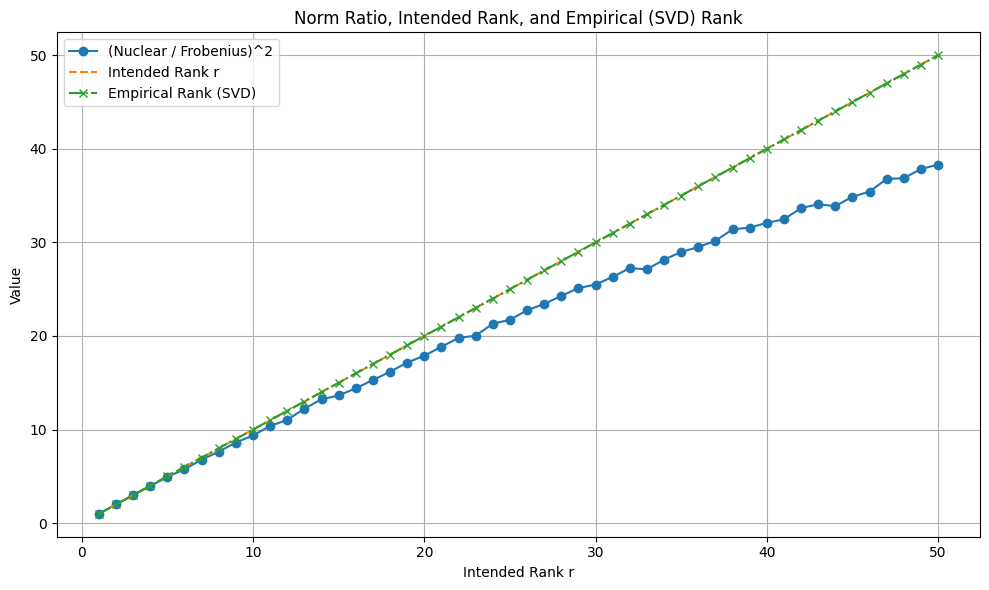

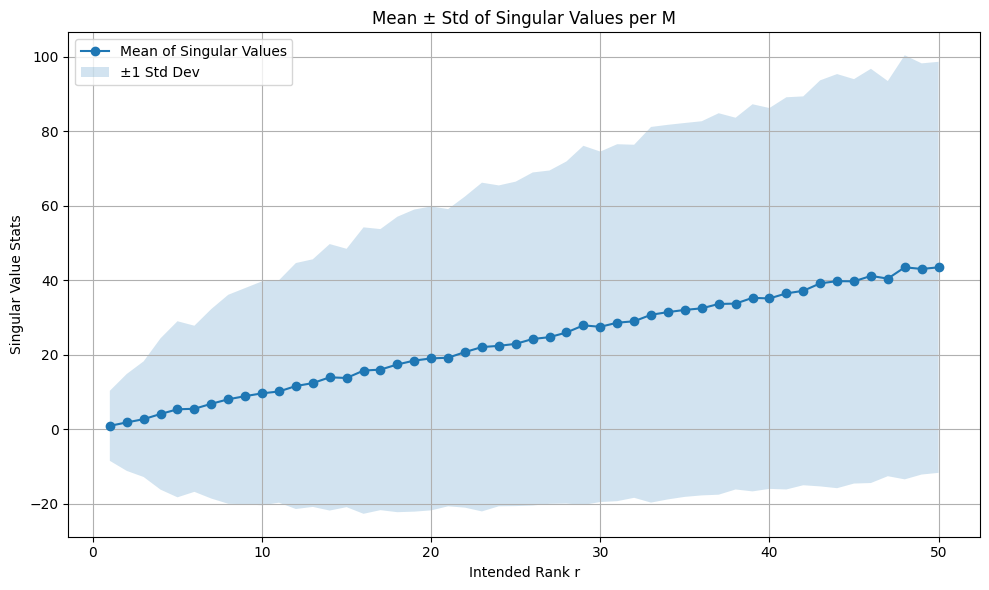

Average Empirical Rank over 50 runs: 25.50


In [30]:
import numpy as np
import matplotlib.pyplot as plt

m, k = 100, 100
n = 50

intended_ranks = []
empirical_ranks = []
ratios = []
singular_value_means = []
singular_value_stds = []

for r in range(1, n + 1):
    A = np.random.randn(m, r)
    B = np.random.randn(r, k)

    """
    if m >= r:
        A, _ = np.linalg.qr(A)
    else:
        _, A = np.linalg.qr(A.T)
        A = A.T

    if k >= r:
        B, _ = np.linalg.qr(B.T)
        B = B.T
    else:
        _, B = np.linalg.qr(B)
    """
    M = A @ B

    frob = np.linalg.norm(M, ord='fro')
    nuclear = np.linalg.norm(M, ord='nuc')
    ratio = (nuclear / frob) ** 2

    # SVD for empirical rank and stats
    _, S, _ = np.linalg.svd(M, full_matrices=False)
    eps = 1e-5
    empirical_rank = np.sum(S > eps)

    intended_ranks.append(r)
    empirical_ranks.append(empirical_rank)
    ratios.append(ratio)

    singular_value_means.append(np.mean(S))
    singular_value_stds.append(np.std(S))

# --- Plot 1: Norm Ratio, Intended vs Empirical Rank
plt.figure(figsize=(10, 6))
plt.plot(intended_ranks, ratios, label='(Nuclear / Frobenius)^2', marker='o')
plt.plot(intended_ranks, intended_ranks, '--', label='Intended Rank r')
plt.plot(intended_ranks, empirical_ranks, '-.', label='Empirical Rank (SVD)', marker='x')
plt.xlabel("Intended Rank r")
plt.ylabel("Value")
plt.title("Norm Ratio, Intended Rank, and Empirical (SVD) Rank")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Mean ± Std of Singular Values per M
means = np.array(singular_value_means)
stds = np.array(singular_value_stds)

plt.figure(figsize=(10, 6))
plt.plot(intended_ranks, means, label='Mean of Singular Values', marker='o')
plt.fill_between(intended_ranks, means - stds, means + stds, alpha=0.2, label='±1 Std Dev')
plt.xlabel("Intended Rank r")
plt.ylabel("Singular Value Stats")
plt.title("Mean ± Std of Singular Values per M")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Average Empirical Rank
avg_empirical_rank = np.mean(empirical_ranks)
print(f"Average Empirical Rank over {n} runs: {avg_empirical_rank:.2f}")

